### 1.读取数据

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

In [2]:
engine = create_engine('mssql+pyodbc://:@claire/baidu_poi?driver=SQL SERVER')

In [3]:
engine.table_names()

['baidu_poi_房地产',
 'baidu_poi_公司企业',
 'baidu_poi_购物',
 'baidu_poi_交通设施',
 'baidu_poi_教育培训',
 'baidu_poi_金融',
 'baidu_poi_酒店',
 'baidu_poi_丽人',
 'baidu_poi_旅游景点',
 'baidu_poi_美食',
 'baidu_poi_汽车服务',
 'baidu_poi_生活服务',
 'baidu_poi_文化传媒',
 'baidu_poi_休闲娱乐',
 'baidu_poi_医疗',
 'baidu_poi_运动健身',
 'baidu_poi_政府机构',
 'POI',
 'POI_JOIN']

In [4]:
with engine.connect()  as conn,conn.begin():
    data = pd.read_sql_table('POI_JOIN',conn)

C:\Users\cc\Anaconda3\lib\site-packages\sqlalchemy\dialects\mssql\base.py:2605: SAWarning: Did not recognize type 'geometry' of column 'Shape'
  % (type_, name)


In [5]:
data.head()

,OBJECTID,Shape,Join_Count,TARGET_FID,Field1,Unnamed__0,name,lat,lng,sort1,sort2,lat_wgs84,lng_wgs84,ID_CHECK
0,1,b'\xe6\x10\x00\x00\x01\x0c\xc4\xff3\xa3\x8f3[@...,1,1,0,0,丰泽科技园-2号楼,34.176428,108.816795,房地产,写字楼,108.805642,34.171962,835.0
1,2,b'\xe6\x10\x00\x00\x01\x0c\xb0\xa8\x8eCG4[@\xb...,1,2,1,1,高新新区,34.173326,108.827928,房地产,写字楼,108.816850,34.168703,704.0
2,3,b'\xe6\x10\x00\x00\x01\x0c\xc4\xc1\xd9\x0b\x97...,1,3,2,2,丰泽科技园-5号楼,34.175525,108.817244,房地产,住宅区,108.806094,34.171053,835.0
3,4,b'\xe6\x10\x00\x00\x01\x0c\xa8\xc5\x1e|\x963[@...,1,4,3,3,丰泽科技路3号楼,34.175989,108.817210,房地产,住宅区,108.806060,34.171517,835.0
4,5,b'\xe6\x10\x00\x00\x01\x0cx\x04\x96z{3[@\x10\x...,1,5,4,4,鑫垚新区,34.174688,108.815573,房地产,住宅区,108.804412,34.170242,835.0


In [19]:
data.columns

Index(['OBJECTID', 'Shape', 'Join_Count', 'TARGET_FID', 'Field1', 'Unnamed__0',
       'name', 'lat', 'lng', 'sort1', 'sort2', 'lat_wgs84', 'lng_wgs84',
       'ID_CHECK'],
      dtype='object')

### 2.筛选数据，只需要id_check

In [6]:
data_01 = data[['ID_CHECK', 'sort1', 'sort2']]

In [7]:
data_01

,ID_CHECK,sort1,sort2
0,835.0,房地产,写字楼
1,704.0,房地产,写字楼
2,835.0,房地产,住宅区
3,835.0,房地产,住宅区
4,835.0,房地产,住宅区
...,...,...,...
169770,8914.0,政府机构,居民委员会
169771,8779.0,政府机构,居民委员会
169772,9184.0,政府机构,各级政府
169773,9319.0,政府机构,行政单位


In [8]:
data_01.groupby(by='ID_CHECK')

#### 按分类生成列

In [11]:
dm = data_01.groupby(by='ID_CHECK')['sort1'].value_counts().unstack().fillna(0)

In [12]:
dm

sort1,丽人,交通设施,休闲娱乐,公司企业,医疗,房地产,政府机构,教育培训,文化传媒,旅游景点,汽车服务,生活服务,美食,购物,运动健身,酒店,金融
ID_CHECK,,,,,,,,,,,,,,,,,
143.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
148.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10781.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10787.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
10788.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0


### 3.计算熵值

In [24]:
dx = dm.copy()

In [25]:
dx.columns

Index(['丽人', '交通设施', '休闲娱乐', '公司企业', '医疗', '房地产', '政府机构', '教育培训', '文化传媒',
       '旅游景点', '汽车服务', '生活服务', '美食', '购物', '运动健身', '酒店', '金融'],
      dtype='object', name='sort1')

In [26]:
#行内数据相加都新列
dx['all'] = dx.apply(lambda x:x.sum(),axis=1)

In [27]:
dx.head()

sort1,丽人,交通设施,休闲娱乐,公司企业,医疗,房地产,政府机构,教育培训,文化传媒,旅游景点,汽车服务,生活服务,美食,购物,运动健身,酒店,金融,all
ID_CHECK,,,,,,,,,,,,,,,,,,
143.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
147.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
148.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
149.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
150.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


基于多源数据时空熵的城市功能混合度识别评价  
按照论文中的数学公式进行计算：
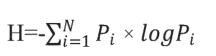

In [19]:
#数学公式需要导入math库
import math

In [28]:
#因为用对ID_check列进行计算，对dx进行重索引
dx.reset_index(inplace=True)
dx.head()

sort1,ID_CHECK,丽人,交通设施,休闲娱乐,公司企业,医疗,房地产,政府机构,教育培训,文化传媒,旅游景点,汽车服务,生活服务,美食,购物,运动健身,酒店,金融,all
0,143.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,147.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
2,148.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,149.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,150.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
#将求熵数学公式进行转换
def get_entropy(n):
    if n[1] == 0:
        return 0
    elif n[0] == 0:
        return 0
    else:
        return -(n[0]/n[1]) * (math.log(n[0]/n[1]))

In [56]:
dx['丽人_熵值'] = dx[['丽人','all']].apply(get_entropy,axis=1)

In [58]:
 dx[dx['丽人'] > 0].head()

sort1,ID_CHECK,丽人,交通设施,休闲娱乐,公司企业,医疗,房地产,政府机构,教育培训,文化传媒,旅游景点,汽车服务,生活服务,美食,购物,运动健身,酒店,金融,all,丽人_熵值
13,174.0,2.0,0.0,0.0,0.0,0.0,16.0,0.0,2.0,0.0,0.0,0.0,0.0,6.0,11.0,1.0,0.0,0.0,38.0,0.154970
33,198.0,4.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,2.0,4.0,3.0,0.0,1.0,0.0,20.0,0.321888
37,202.0,2.0,1.0,2.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0,16.0,0.259930
38,203.0,1.0,5.0,0.0,5.0,0.0,12.0,4.0,0.0,0.0,0.0,0.0,4.0,2.0,5.0,1.0,0.0,5.0,44.0,0.086004
39,204.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,2.0,4.0,1.0,0.0,1.0,5.0,20.0,0.149787


#### 对每种类型求熵

In [61]:
pois = ['丽人', '交通设施', '休闲娱乐', '公司企业', '医疗', '房地产', '政府机构', '教育培训', '文化传媒',
       '旅游景点', '汽车服务', '生活服务', '美食', '购物', '运动健身', '酒店', '金融']
for i in pois:
    dx['{}_熵值'.format(i)] = dx[[i,'all']].apply(get_entropy,axis=1)

In [63]:
 dx[dx['丽人'] > 0].head()

sort1,ID_CHECK,丽人,交通设施,休闲娱乐,公司企业,医疗,房地产,政府机构,教育培训,文化传媒,...,教育培训_熵值,文化传媒_熵值,旅游景点_熵值,汽车服务_熵值,生活服务_熵值,美食_熵值,购物_熵值,运动健身_熵值,酒店_熵值,金融_熵值
13,174.0,2.0,0.0,0.0,0.0,0.0,16.0,0.0,2.0,0.0,...,0.154970,0.0,0.0,0.000000,0.000000,0.291446,0.358858,0.095726,0.000000,0.000000
33,198.0,4.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,...,0.230259,0.0,0.0,0.149787,0.230259,0.321888,0.284568,0.000000,0.149787,0.000000
37,202.0,2.0,1.0,2.0,3.0,1.0,2.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.173287,0.000000,0.313871,0.000000,0.173287,0.000000
38,203.0,1.0,5.0,0.0,5.0,0.0,12.0,4.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.217990,0.140502,0.247131,0.086004,0.000000,0.247131
39,204.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0,...,0.149787,0.0,0.0,0.000000,0.230259,0.321888,0.149787,0.000000,0.149787,0.346574


In [65]:
dx['总熵值'] = 0
for i in pois:
    dx['总熵值'] += dx[i + '_熵值']

In [66]:
 dx[dx['丽人'] > 0].head()

sort1,ID_CHECK,丽人,交通设施,休闲娱乐,公司企业,医疗,房地产,政府机构,教育培训,文化传媒,...,文化传媒_熵值,旅游景点_熵值,汽车服务_熵值,生活服务_熵值,美食_熵值,购物_熵值,运动健身_熵值,酒店_熵值,金融_熵值,总熵值
13,174.0,2.0,0.0,0.0,0.0,0.0,16.0,0.0,2.0,0.0,...,0.0,0.0,0.000000,0.000000,0.291446,0.358858,0.095726,0.000000,0.000000,1.420181
33,198.0,4.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,...,0.0,0.0,0.149787,0.230259,0.321888,0.284568,0.000000,0.149787,0.000000,2.068479
37,202.0,2.0,1.0,2.0,3.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.173287,0.000000,0.313871,0.000000,0.173287,0.000000,2.100679
38,203.0,1.0,5.0,0.0,5.0,0.0,12.0,4.0,0.0,0.0,...,0.0,0.0,0.000000,0.217990,0.140502,0.247131,0.086004,0.000000,0.247131,2.091365
39,204.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0,...,0.0,0.0,0.000000,0.230259,0.321888,0.149787,0.000000,0.149787,0.346574,2.082007


In [67]:
dx_entropy = dx[['ID_CHECK','总熵值']]
dx_entropy.head()

sort1,ID_CHECK,总熵值
0,143.0,0.000000
1,147.0,1.098612
2,148.0,0.000000
3,149.0,0.636514
4,150.0,0.000000


In [68]:
dx_entropy.to_csv(r'../../file/subject/chapter5/entropy.csv')